                                                  # Customer Churn Analysis

## 1.Data Collection and Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings("ignore")

['.ipynb_checkpoints', 'cleaned_data.xlsx', 'Customer churn analysis-Copy1.ipynb', 'Customer churn analysis.ipynb', 'E Commerce Dataset.xlsx', 'performance.png']


In [2]:
df=pd.read_excel("E Commerce Dataset.xlsx",sheet_name="E Comm")

In [3]:
print(df)

      CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0 

In [4]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
df.shape

(5630, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

There are missing values in several columns such as Tenure, WarehouseToHome, HourSpendOnApp,and others. These null values need to be handled before data modeling.

In [8]:
df.duplicated().sum()

np.int64(0)

No duplicate records found in the dataset.  
Data is clean and ready for further analysis.

In [9]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


### Unique Value Analysis

Column-wise unique values are analyzed to detect repeated or inconsistent data.

In [10]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: CustomerID
[50001 50002 50003 ... 55628 55629 55630]

Column: Churn
[1 0]

Column: Tenure
[ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]

Column: PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']

Column: CityTier
[3 1 2]

Column: WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]

Column: PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Column: Gender
['Female' 'Male']

Column: HourSpendOnApp
[ 3.  2. nan  1.  0.  4.  5.]

Column: NumberOfDeviceRegistered
[3 4 5 2 1 6]

Column: PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

Column: SatisfactionScore
[2 3 5 4 1]

Column: MaritalStatus
['Single' 'Divorced' 'Married']

Column: Number

Some columns contain repeated or similar category values.  
For example, in 'PreferedOrderCat', entries like 'Mobile' and 'Mobile Phone' refer to the same category and need standardization.


## 2.EDA (Exploratory Data Analysis)

### 2.1 Data Type Separation(Numeric and Categorical Feature Separation)

In [160]:
num_cols=df.select_dtypes(include=["int64","float64"]).columns.tolist()
print(num_cols)

['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [161]:
cag_col =df.select_dtypes(include=["object"]).columns.tolist()
print(cag_col)

['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


### 2.2 Standardizing Category Names

In [162]:
df['PreferredLoginDevice']=df['PreferredLoginDevice'].replace({'Mobile Phone':'Phone'})

In [163]:
df['PreferredPaymentMode']=df['PreferredPaymentMode'].replace({'CC':'Credit Card','COD':'Cash on Delivery'})

In [164]:
df['PreferedOrderCat']=df['PreferedOrderCat'].replace({'Mobile Phone':'Phone','Mobile':'Phone'})

In [165]:
#Verify Unique Values After Standardization
cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat']

# Loop only through these columns
for col in cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: PreferredLoginDevice
['Phone' 'Computer']

Column: PreferredPaymentMode
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']

Column: PreferedOrderCat
['Laptop & Accessory' 'Phone' 'Others' 'Fashion' 'Grocery']


### 2.3 Missing Value Handling

In [166]:
df.isna().sum()[df.isna().sum() > 0]

Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64

In [167]:
cols = ["Tenure", "WarehouseToHome", "HourSpendOnApp", 
        "OrderAmountHikeFromlastYear", "CouponUsed", 
        "OrderCount", "DaySinceLastOrder"]
print(df[cols].skew())

Tenure                         0.736513
WarehouseToHome                1.619154
HourSpendOnApp                -0.027213
OrderAmountHikeFromlastYear    0.790785
CouponUsed                     2.545653
OrderCount                     2.196414
DaySinceLastOrder              1.191000
dtype: float64


Skewness analysis shows that most columns are positively skewed(skewness > 0.5), meaning data is not evenly distributed.  
Median imputation is preferred for skewed columns, while mean is used for nearly symmetric data like HourSpendOnApp.

In [168]:
tenure_median = df["Tenure"].median()
df["Tenure"] = df["Tenure"].fillna(tenure_median)

print("Median Tenure used for filling:", tenure_median)
print("Remaining NaN in Tenure:", df["Tenure"].isna().sum())

Median Tenure used for filling: 9.0
Remaining NaN in Tenure: 0


- Units of **Tenure** (months/years/weeks) are not clearly defined.  
- Used **median imputation** since it is less sensitive to outliers and maintains consistency.  

**Documentation:**  
Tenure column had missing values; imputed with median due to unclear unit definition.

In [169]:
WarehouseToHome_median = df["WarehouseToHome"].median()
df["WarehouseToHome"] = df["WarehouseToHome"].fillna(WarehouseToHome_median)

print("Median WarehouseToHome used for filling:",WarehouseToHome_median)
print("Remaining NaN in WarehouseToHome:", df["WarehouseToHome"].isna().sum())

Median WarehouseToHome used for filling: 14.0
Remaining NaN in WarehouseToHome: 0


In [170]:
HourSpendOnApp_median = df["HourSpendOnApp"].median()
df["HourSpendOnApp"] = df["HourSpendOnApp"].fillna(HourSpendOnApp_median)

print("Median HourSpendOnApp used for filling:",HourSpendOnApp_median)
print("Remaining NaN in HourSpendOnApp:", df["HourSpendOnApp"].isna().sum())

Median HourSpendOnApp used for filling: 3.0
Remaining NaN in HourSpendOnApp: 0


In [171]:
OrderAmountHikeFromlastYear_median = df["OrderAmountHikeFromlastYear"].median()
df["OrderAmountHikeFromlastYear"] = df["OrderAmountHikeFromlastYear"].fillna(OrderAmountHikeFromlastYear_median)

print("Median OrderAmountHikeFromlastYear used for filling:",OrderAmountHikeFromlastYear_median)
print("Remaining NaN in OrderAmountHikeFromlastYear:", df["OrderAmountHikeFromlastYear"].isna().sum())

Median OrderAmountHikeFromlastYear used for filling: 15.0
Remaining NaN in OrderAmountHikeFromlastYear: 0


In [172]:
CouponUsed_median = df["CouponUsed"].median()
df["CouponUsed"] = df["CouponUsed"].fillna(CouponUsed_median)

print("Median CouponUsed used for filling:",CouponUsed_median)
print("Remaining NaN in CouponUsed:", df["CouponUsed"].isna().sum())

Median CouponUsed used for filling: 1.0
Remaining NaN in CouponUsed: 0


In [173]:
OrderCount_median = df["OrderCount"].median()
df["OrderCount"] = df["OrderCount"].fillna(OrderCount_median)

print("Median OrderCount used for filling:",OrderCount_median)
print("Remaining NaN in OrderCount:", df["OrderCount"].isna().sum())

Median OrderCount used for filling: 2.0
Remaining NaN in OrderCount: 0


In [174]:
DaySinceLastOrder_median = df["DaySinceLastOrder"].median()
df["DaySinceLastOrder"] = df["DaySinceLastOrder"].fillna(DaySinceLastOrder_median)

print("Median DaySinceLastOrder used for filling:",DaySinceLastOrder_median)
print("Remaining NaN in DaySinceLastOrder:", df["DaySinceLastOrder"].isna().sum())

Median DaySinceLastOrder used for filling: 3.0
Remaining NaN in DaySinceLastOrder: 0


In [175]:
#Post-Imputation Null Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### 2.4 Numeric and Categorical Column Separation (Business Perspective)

The dataset columns are divided based on their data type and business meaning:

- **Numeric Columns:**  
  These represent measurable or count-based data (e.g., time, quantity, or frequency).  
  They are suitable for scaling or normalization before model training.  
  Examples: Tenure, WarehouseToHome, HourSpendOnApp, NumberOfDeviceRegistered, OrderCount, etc.

- **Categorical Columns:**  
  These represent qualitative information such as customer preferences or categories.  
  They require encoding before use in a machine learning model.

  - **Nominal:** No natural order between categories (e.g., Gender, Payment Mode, Complain).  
  - **Ordinal:** Have a defined order or ranking (e.g., CityTier, SatisfactionScore).

This separation helps in choosing the right preprocessing and encoding methods for each type of data.

In [176]:
# ✅ Numeric columns
numeric_cols = [
    "Tenure", 
    "WarehouseToHome", 
    "HourSpendOnApp", 
    "NumberOfDeviceRegistered", 
    "NumberOfAddress", 
    "OrderAmountHikeFromlastYear", 
    "CouponUsed", 
    "OrderCount", 
    "DaySinceLastOrder", 
    "CashbackAmount"
]

# ✅ Categorical - Nominal columns
nominal_cols = [
    "PreferredLoginDevice", 
    "PreferredPaymentMode", 
    "Gender", 
    "PreferedOrderCat", 
    "MaritalStatus", 
    "Complain"   
]

# ✅ Categorical - Ordinal columns
ordinal_cols = [
    "CityTier", 
    "SatisfactionScore"
]

# ✅ Target column
target_col = "Churn"

### 2.5 Target Variable Analysis (Categorical Operation)

In [177]:
df[target_col].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

In [178]:
df[target_col].value_counts(normalize=True)*100

Churn
0    83.161634
1    16.838366
Name: proportion, dtype: float64

**conclusion:**
out of 5630 customers, 83% customers are active and 17% are stopped using the service

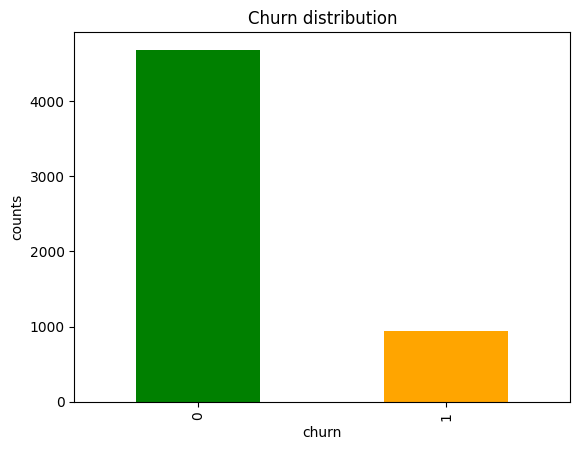

In [179]:
df[target_col].value_counts().plot(kind="bar", color=["green","orange"])
plt.xlabel("churn")
plt.ylabel("counts")
plt.title("Churn distribution")
plt.show()

To balance the dataset, **SMOTE (Synthetic Minority Oversampling Technique)** was applied **before modeling**.  
It generates synthetic samples for the minority class (**Churn = 1**) to balance the dataset and ensure fair model training.

### 2.6 Univariate Analysis
Univariate analysis focuses on understanding the distribution and characteristics of a single variable.  
It helps identify data patterns, outliers, and the overall range of values.

#### 2.6.1 Discrete Numeric Columns Analysis

NumberOfDeviceRegistered
4    42.220249
3    30.177620
5    15.648313
2     4.902309
1     4.174067
6     2.877442
Name: count, dtype: float64


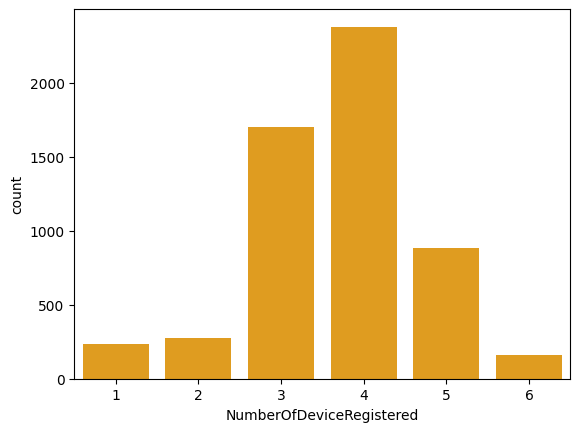

In [180]:
# NumberOfDeviceRegistered column 
import seaborn as sns
print((df['NumberOfDeviceRegistered'].value_counts()/df['NumberOfDeviceRegistered'].count())*100)
sns.countplot(x='NumberOfDeviceRegistered',data=df,color="orange")
plt.show()

Most customers are registered 4 devices.

NumberOfAddress
2     24.316163
3     22.699822
4     10.444050
5     10.142096
6      6.785080
1      6.589698
8      4.973357
7      4.547069
9      4.245115
10     3.445826
11     1.740675
19     0.017762
21     0.017762
20     0.017762
22     0.017762
Name: count, dtype: float64


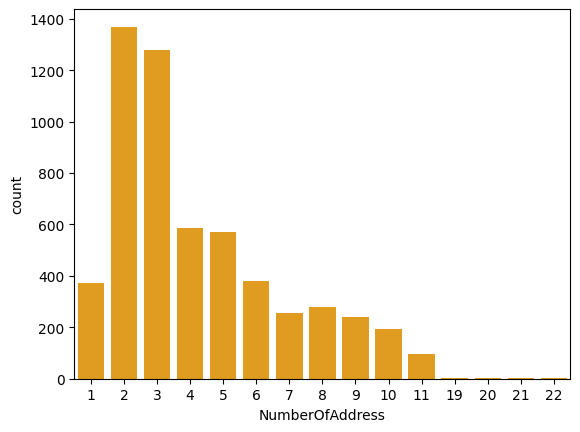

In [181]:
#NumberOfAddres column 
print((df['NumberOfAddress'].value_counts()/df['NumberOfAddress'].count())*100)
sns.countplot(x='NumberOfAddress',data=df,color='orange')
plt.show()

Number of address 2 are registered more

#### 2.6.2Continuous Numeric Columns Analysis

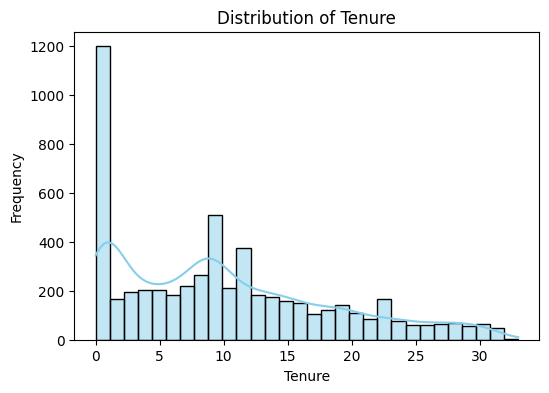

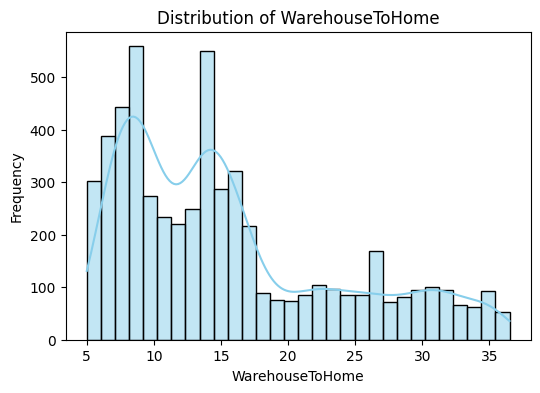

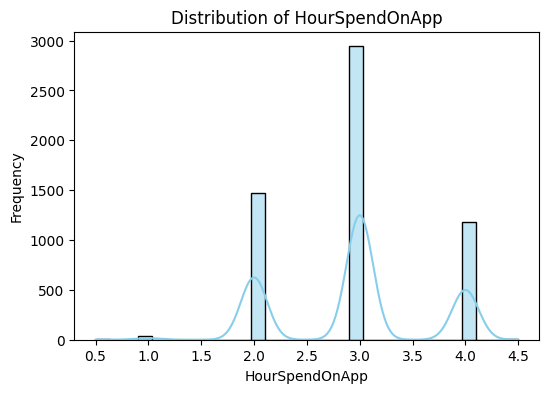

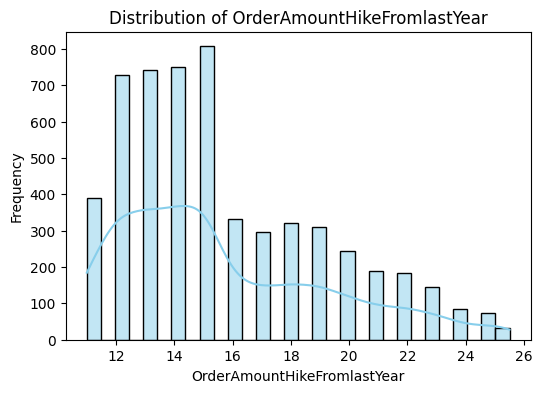

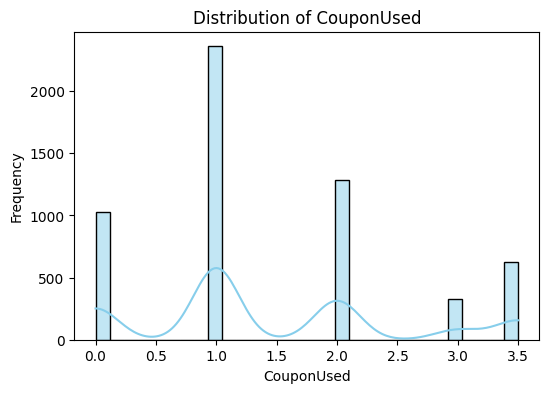

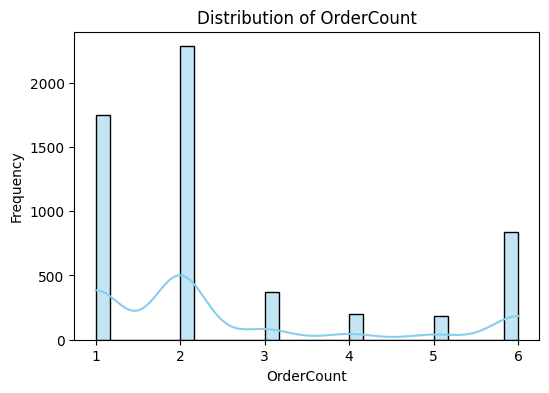

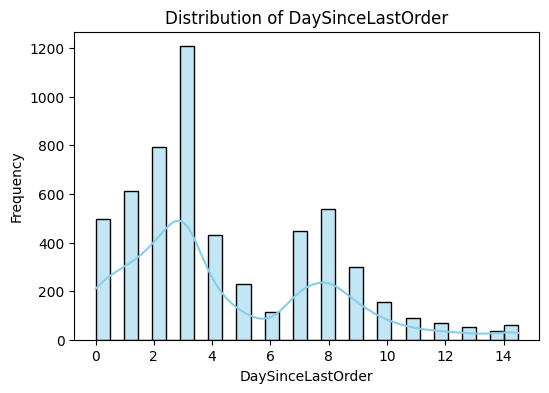

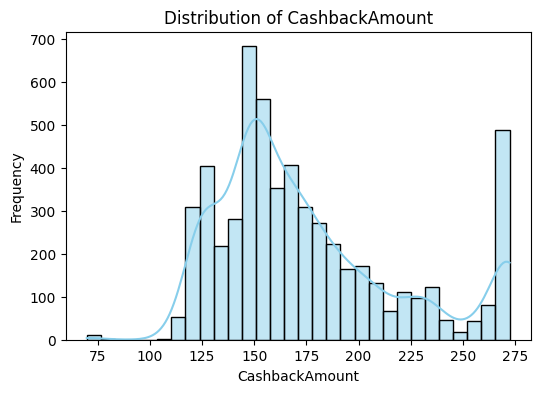

In [204]:
Continuous_cols = [
    "Tenure", "WarehouseToHome", "HourSpendOnApp",
    "OrderAmountHikeFromlastYear", "CouponUsed",
    "OrderCount", "DaySinceLastOrder", "CashbackAmount"
]

# Plot histogram for each continuous numeric column
for col in Continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [183]:
# Continuous numeric columns
_cols = [
    "Tenure",
    "WarehouseToHome",
    "HourSpendOnApp",
    "OrderAmountHikeFromlastYear",
    "CouponUsed",
    "OrderCount",
    "DaySinceLastOrder",
    "CashbackAmount"
]

# Display value counts for each column
for col in cont_cols:
    print(f"\n--- Value Counts for {col} ---")
    print(df[col].value_counts().sort_index())   # sort_index shows values in order


--- Value Counts for Tenure ---
Tenure
0.0     508
1.0     690
2.0     167
3.0     195
4.0     203
5.0     204
6.0     183
7.0     221
8.0     263
9.0     511
10.0    213
11.0    194
12.0    182
13.0    181
14.0    176
15.0    159
16.0    149
17.0    106
18.0    123
19.0    140
20.0    109
21.0     84
22.0     76
23.0     89
24.0     75
25.0     59
26.0     60
27.0     66
28.0     70
29.0     55
30.0     66
31.0     49
50.0      1
51.0      1
60.0      1
61.0      1
Name: count, dtype: int64

--- Value Counts for WarehouseToHome ---
WarehouseToHome
5.0        8
6.0      295
7.0      389
8.0      444
9.0      559
10.0     274
11.0     233
12.0     221
13.0     249
14.0     550
15.0     288
16.0     322
17.0     217
18.0      89
19.0      75
20.0      74
21.0      85
22.0     104
23.0      96
24.0      85
25.0      86
26.0      89
27.0      81
28.0      71
29.0      81
30.0      94
31.0     101
32.0      94
33.0      67
34.0      63
35.0      93
36.0      51
126.0      1
127.0      1
Na

Tenure:

Most customers are new with short tenures (0–10 weeks). Few stay longer than 30 weeks, showing low long-term retention.

WarehouseToHome:

Most customers live 7–17 km from the warehouse. Few are beyond 30 km, meaning most deliveries are local.

HourSpendOnApp:

Most customers spend 2–4 hours daily on the app, showing steady engagement. Very few use it for extreme hours.

OrderAmountHikeFromlastYear:

Most customers saw an 11–15% hike in order amounts. High growth above 20% is rare.

CouponUsed:

Most customers use 1–2 coupons. Frequent coupon users (6+) are very few.

OrderCount:

Majority place only 1–2 orders, showing low buying frequency. Repeat buyers (5+) are limited.

DaySinceLastOrder:

Most customers reorder within 1–3 days. Long gaps (10+ days) may indicate churn risk.

CashbackAmount:

Cashback values vary widely, suggesting they depend on purchase amount or offer type.

#### 2.6.3Categorical Feature Analysis (Univariate)

PreferedOrderCat
Phone                 36.944938
Laptop & Accessory    36.412078
Fashion               14.671403
Grocery                7.282416
Others                 4.689165
Name: count, dtype: float64


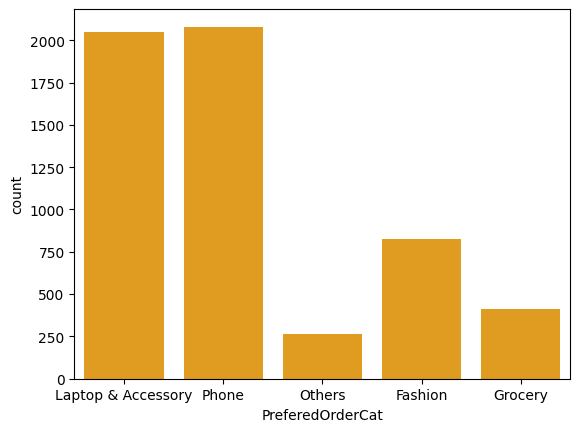

In [184]:
# PreferedOrderCat column 
print((df['PreferedOrderCat'].value_counts()/df['PreferedOrderCat'].count())*100)
sns.countplot(x='PreferedOrderCat',data=df,color='orange')
plt.show()

Customers most perferred category is laptop and accessories, then phone

SatisfactionScore
3    30.159858
1    20.674956
5    19.680284
4    19.076377
2    10.408526
Name: count, dtype: float64


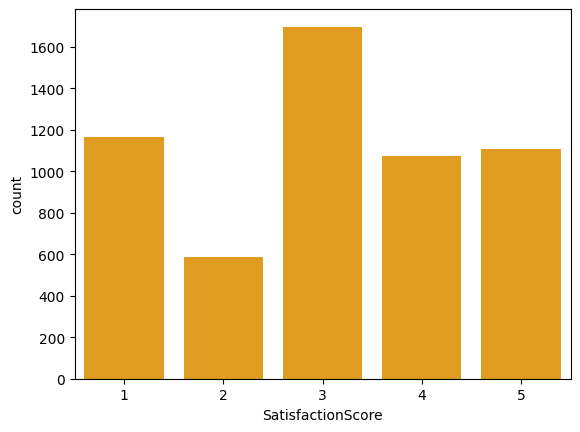

In [185]:
# SatisfactionScore column 
print((df['SatisfactionScore'].value_counts()/df['SatisfactionScore'].count())*100)
sns.countplot(x='SatisfactionScore',data=df,color='orange')
plt.show()

customers gave 3 ratings mostly

PreferredLoginDevice
Phone       70.976909
Computer    29.023091
Name: count, dtype: float64


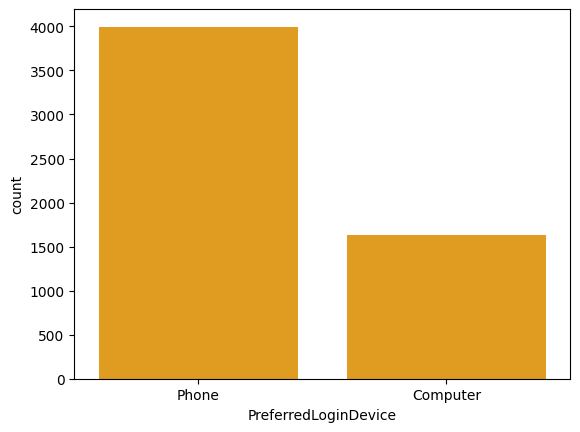

In [186]:
# PreferredLoginDevice column 
print((df['PreferredLoginDevice'].value_counts()/df['PreferredLoginDevice'].count())*100)
sns.countplot(x='PreferredLoginDevice',data=df,color='orange')
plt.show()

customers mostly used phone to login 

PreferredPaymentMode
Debit Card          41.101243
Credit Card         31.509769
E wallet            10.905861
Cash on Delivery     9.129663
UPI                  7.353464
Name: count, dtype: float64


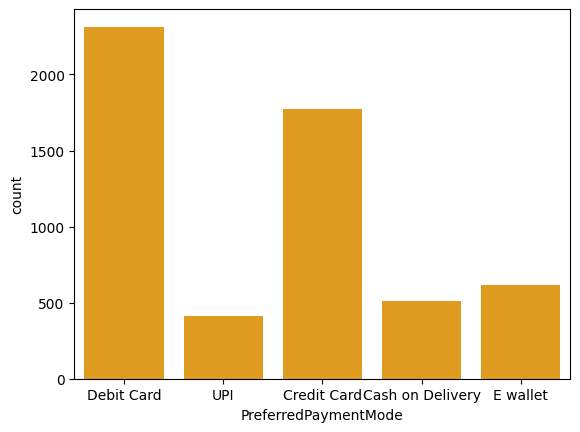

In [187]:
# PreferredPaymentMode column 
print((df['PreferredPaymentMode'].value_counts()/df['PreferredPaymentMode'].count())*100)
sns.countplot(x='PreferredPaymentMode',data=df,color='orange')
plt.show()

customers are mostly used debitcards to purchase

Gender
Male      60.106572
Female    39.893428
Name: count, dtype: float64


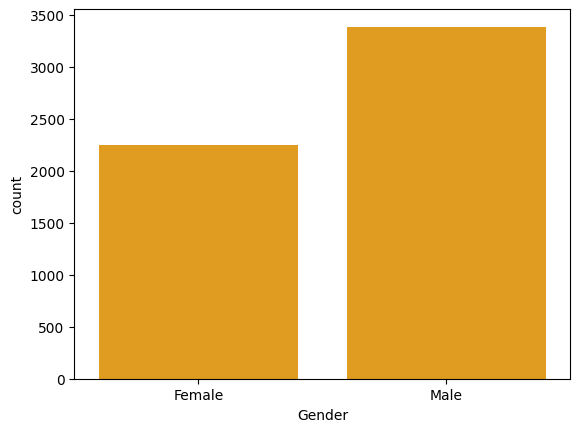

In [188]:
# Gender column 
print((df['Gender'].value_counts()/df['Gender'].count())*100)
sns.countplot(x='Gender',data=df,color='orange')
plt.show()

Males are purchasing more than females

MaritalStatus
Married     53.037300
Single      31.900533
Divorced    15.062167
Name: count, dtype: float64


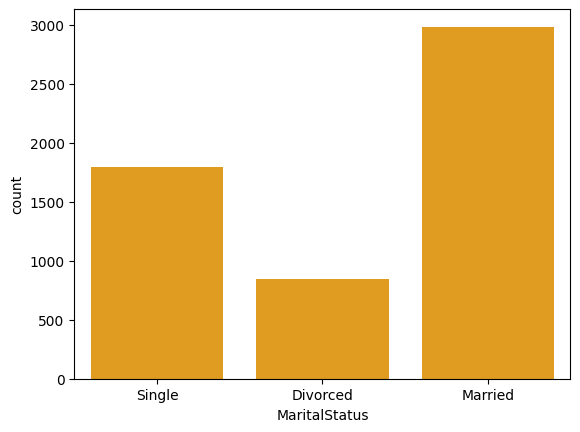

In [189]:
#MaritalStatus column 
print((df['MaritalStatus'].value_counts()/df['MaritalStatus'].count())*100)
sns.countplot(x='MaritalStatus',data=df,color='orange')
plt.show()

Married are most purchasing customers

Complain
0    71.509769
1    28.490231
Name: count, dtype: float64


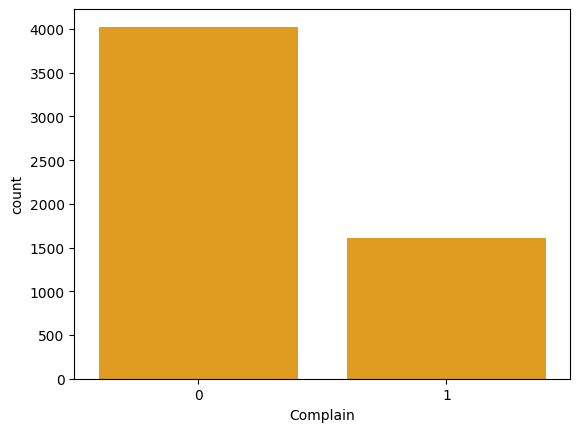

In [190]:
#Complain column 
print((df['Complain'].value_counts()/df['Complain'].count())*100)
sns.countplot(x='Complain',data=df,color='orange')
plt.show()

Customer did NOT make a complaint are higher 

CityTier
1    65.115453
3    30.586146
2     4.298401
Name: count, dtype: float64


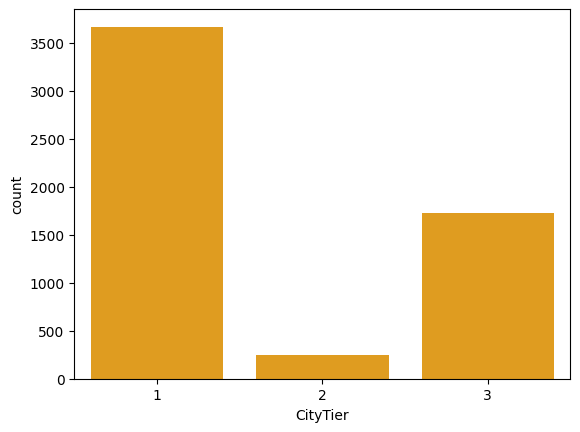

In [191]:
#citytier column 
print((df['CityTier'].value_counts()/df['CityTier'].count())*100)
sns.countplot(x='CityTier',data=df,color='orange')
plt.show()

Most customers (65%) are from CityTier 1, indicating dominance of metro-city users.
Very few (4%) are from CityTier 2, showing low representation from mid-tier cities.

### 2.7 Outlier Detection – Continuous Numeric Columns

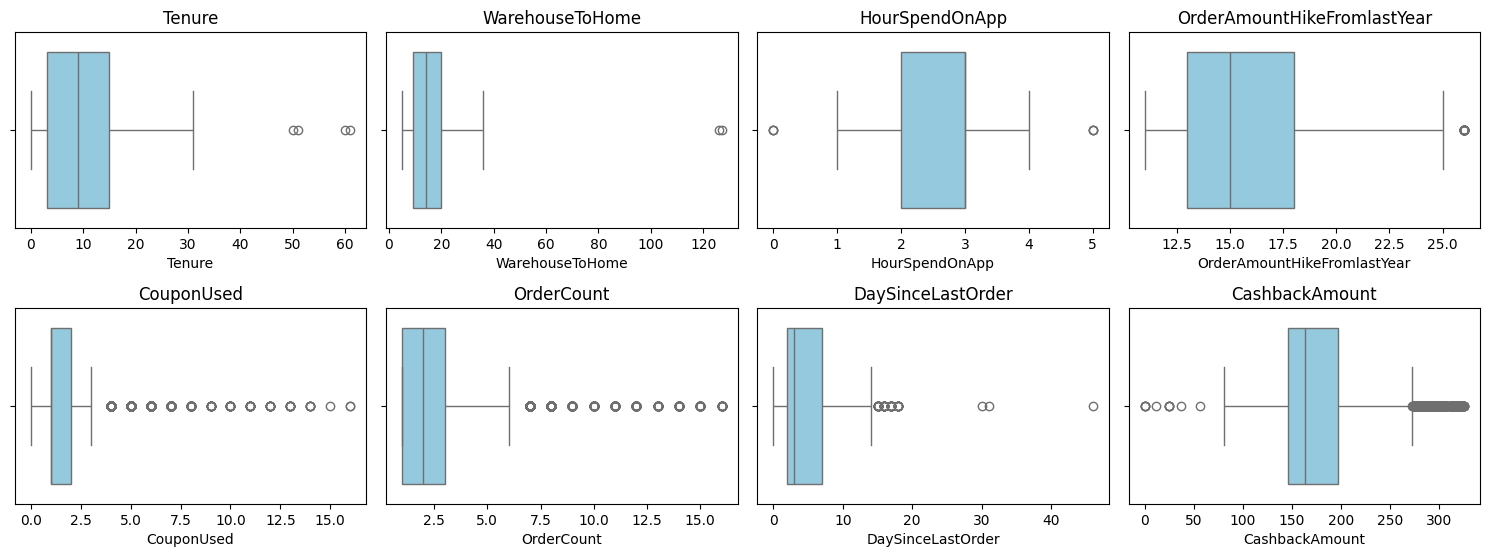

In [192]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [193]:
print("Outlier count BEFORE capping:\n")

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

Outlier count BEFORE capping:

Tenure: 4 outliers
WarehouseToHome: 2 outliers
HourSpendOnApp: 6 outliers
OrderAmountHikeFromlastYear: 33 outliers
CouponUsed: 629 outliers
OrderCount: 703 outliers
DaySinceLastOrder: 62 outliers
CashbackAmount: 438 outliers


In [194]:
# Numeric columns
numeric_cols = [
    "Tenure", "WarehouseToHome", "HourSpendOnApp",
    "OrderAmountHikeFromlastYear", "CouponUsed",
    "OrderCount", "DaySinceLastOrder", "CashbackAmount"
]

# Display skewness
for col in numeric_cols:
    skew_value = df[col].skew()
    print(f"{col} → Skewness: {skew_value:.2f}")

Tenure → Skewness: 0.77
WarehouseToHome → Skewness: 1.68
HourSpendOnApp → Skewness: -0.04
OrderAmountHikeFromlastYear → Skewness: 0.84
CouponUsed → Skewness: 2.63
OrderCount → Skewness: 2.28
DaySinceLastOrder → Skewness: 1.27
CashbackAmount → Skewness: 1.15


#### Outlier Capping

In [195]:
import numpy as np
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

In [196]:
print("\n Outlier count AFTER capping:\n")

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


 Outlier count AFTER capping:

Tenure: 0 outliers
WarehouseToHome: 0 outliers
HourSpendOnApp: 0 outliers
OrderAmountHikeFromlastYear: 0 outliers
CouponUsed: 0 outliers
OrderCount: 0 outliers
DaySinceLastOrder: 0 outliers
CashbackAmount: 0 outliers


Based on skewness and distribution analysis, several numeric columns showed moderate to strong skew and potential outliers (e.g., OrderCount, WarehouseToHome, CashbackAmount).
To handle these outliers, capping using the IQR method was applied. Values below Q1 - 1.5×IQR or above Q3 + 1.5×IQR were replaced with the respective threshold values.
Columns with near-zero skew (HourSpendOnApp) were left unchanged, as they did not have significant outliers.

### 2.8 Bivariate Analysis

#### 2.8.1 Numeric Features vs Target (Churn)

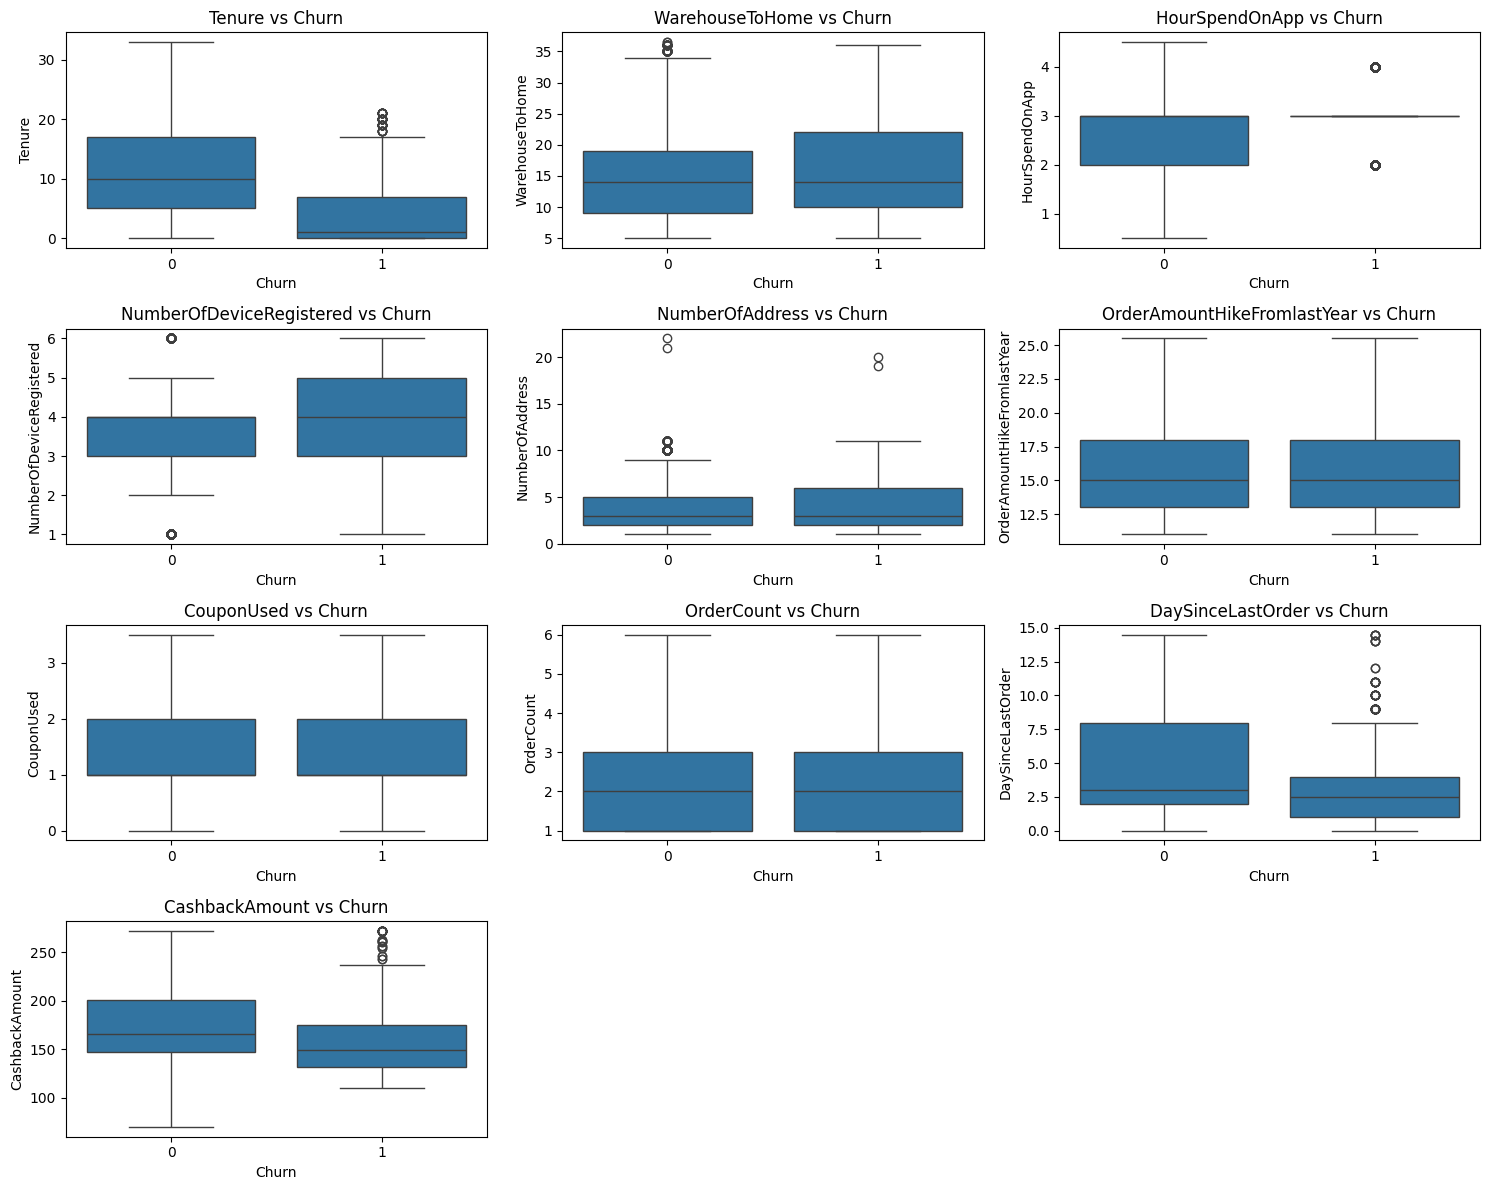

In [197]:
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
            'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed',
            'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

In [198]:
#correlation analysis
corr_data = df[numeric_cols + ['Churn']]
corr_with_churn = corr_data.corr()['Churn'].sort_values(ascending=False)
print(corr_with_churn)

Churn                          1.000000
WarehouseToHome                0.073529
HourSpendOnApp                 0.018861
OrderAmountHikeFromlastYear   -0.006856
CouponUsed                    -0.008644
OrderCount                    -0.029832
CashbackAmount                -0.160194
DaySinceLastOrder             -0.162501
Tenure                        -0.339678
Name: Churn, dtype: float64


Most numeric features show very weak correlation with churn.

Tenure has the strongest effect: customers with longer tenure are less likely to churn.

DaySinceLastOrder and CashbackAmount show slight negative correlation: customers who ordered recently or received more cashback are slightly less likely to churn.

Other features like HourSpendOnApp, OrderCount, CouponUsed, WarehouseToHome, OrderAmountHikeFromlastYear have almost no correlation with churn.

#### 2.8.2 categorical Features vs Target (Churn)

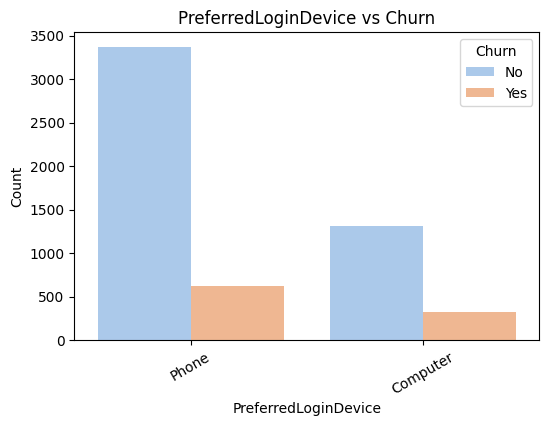

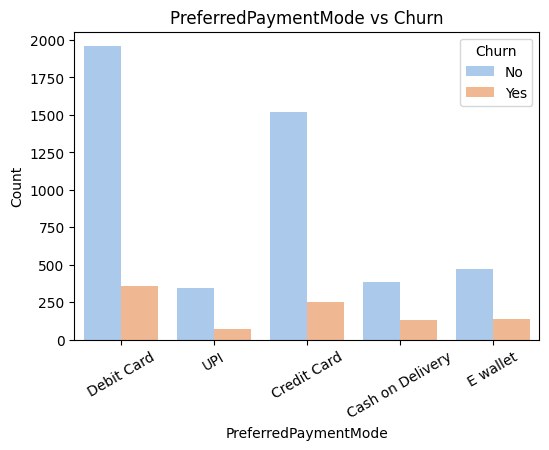

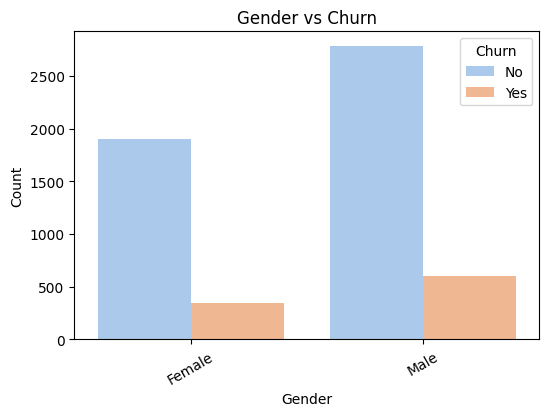

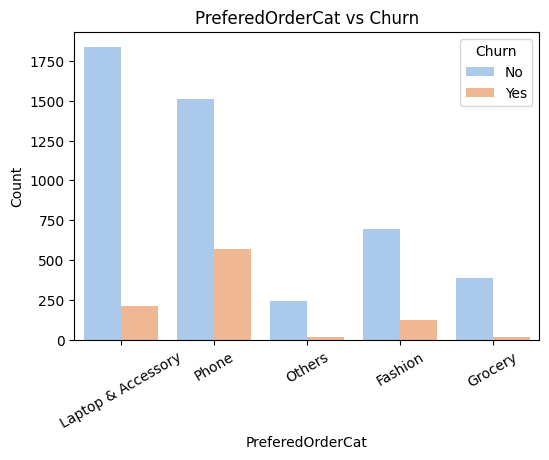

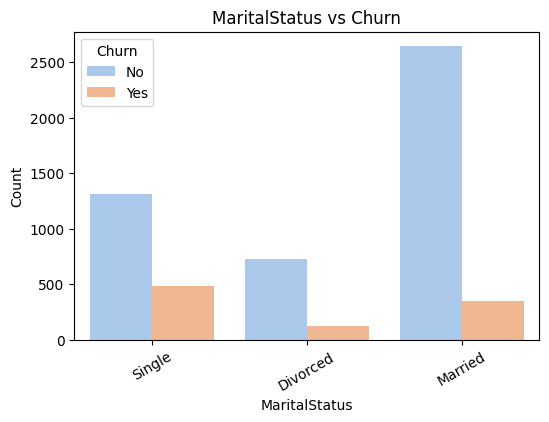

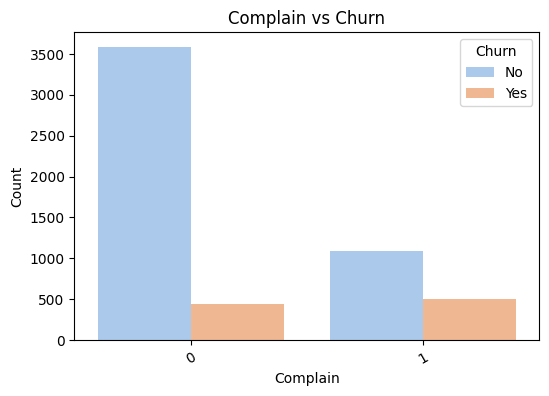

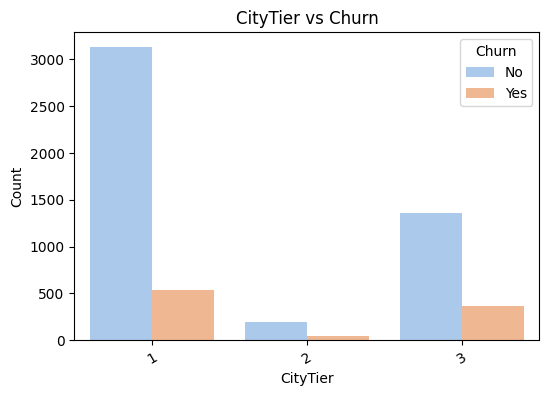

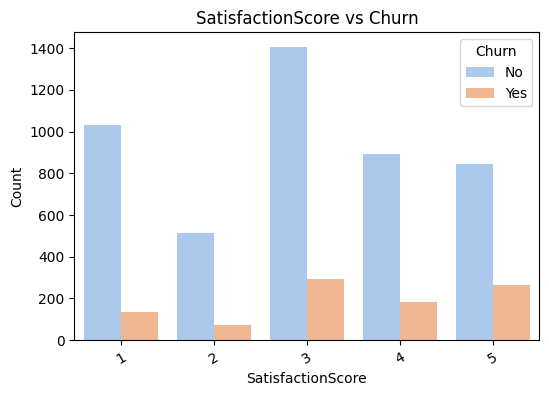

In [199]:
cat_cols = [
    "PreferredLoginDevice",
    "PreferredPaymentMode",
    "Gender",
    "PreferedOrderCat",
    "MaritalStatus",
    "Complain",
    "CityTier",
    "SatisfactionScore"
]

# Plot countplot with hue for each categorical column
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df, palette='pastel')
    plt.title(f"{col} vs Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.show()

In [200]:
#Cross-tabulation with Churn percentages
for col in cat_cols:
    ctab = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    print(f"\n--- {col} vs Churn (%) ---")
    print(ctab.round(2))


--- PreferredLoginDevice vs Churn (%) ---
Churn                     0      1
PreferredLoginDevice              
Computer              80.17  19.83
Phone                 84.38  15.62

--- PreferredPaymentMode vs Churn (%) ---
Churn                     0      1
PreferredPaymentMode              
Cash on Delivery      75.10  24.90
Credit Card           85.79  14.21
Debit Card            84.62  15.38
E wallet              77.20  22.80
UPI                   82.61  17.39

--- Gender vs Churn (%) ---
Churn       0      1
Gender              
Female  84.51  15.49
Male    82.27  17.73

--- PreferedOrderCat vs Churn (%) ---
Churn                   0      1
PreferedOrderCat                
Fashion             84.50  15.50
Grocery             95.12   4.88
Laptop & Accessory  89.76  10.24
Others              92.42   7.58
Phone               72.60  27.40

--- MaritalStatus vs Churn (%) ---
Churn              0      1
MaritalStatus              
Divorced       85.38  14.62
Married        88.48  11.5

Customers who complain, are single, or order phones have higher churn.

Cash on Delivery and E-wallet users also show higher churn than card users.

Customers from smaller cities (Tier 2 & 3) and using computers are slightly more likely to churn.

## 3.Feature preparation / preprocessing

### 3.1 Encoding Categorical Columns

#### 3.1.1 One-Hot Encoding for Nominal Columns

In [203]:
nominal = [
    "PreferredLoginDevice", 
    "PreferredPaymentMode", 
    "Gender", 
    "PreferedOrderCat", 
    "MaritalStatus"
]
df = pd.get_dummies(df, columns=nominal, drop_first=True)

# Verify the new columns
print(df.head())

KeyError: "None of [Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',\n       'PreferedOrderCat', 'MaritalStatus'],\n      dtype='object')] are in the [columns]"

#### 3.1.2 Feature Scaling

In [206]:
from sklearn.preprocessing import StandardScaler
Continuous_cols = [
    "Tenure",
    "WarehouseToHome",
    "HourSpendOnApp",
    "OrderAmountHikeFromlastYear",
    "CouponUsed",
    "OrderCount",
    "DaySinceLastOrder",
    "CashbackAmount"
]

scaler = StandardScaler()

# scale only numeric columns
df[Continuous_cols] = scaler.fit_transform(df[Continuous_cols])
df[Continuous_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,-2.019304e-17,1.000089,-1.220433,-0.858577,-0.134866,0.588846,2.759980
WarehouseToHome,5630.0,8.582044e-17,1.000089,-1.302426,-0.807903,-0.189750,0.552034,2.591939
HourSpendOnApp,5630.0,1.615444e-16,1.000089,-3.459450,-1.328053,0.092878,0.092878,2.224275
OrderAmountHikeFromlastYear,5630.0,4.038609e-17,1.000089,-1.304023,-0.745755,-0.187486,0.649917,2.743424
CouponUsed,5630.0,-4.038609e-17,1.000089,-1.344668,-0.411136,-0.411136,0.522397,1.922695
OrderCount,5630.0,-1.211583e-16,1.000089,-0.888745,-0.888745,-0.304276,0.280192,2.033597
DaySinceLastOrder,5630.0,1.211583e-16,1.000089,-1.287958,-0.706373,-0.415580,0.747590,2.928534
CashbackAmount,5630.0,-4.240539e-16,1.000089,-2.393869,-0.670682,-0.273323,0.478108,2.201294


## 4.Train/Test Split and SMOTE for Target Balancing

In [207]:
!pip install imbalanced-learn

In [209]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop('Churn', axis=1)
y = df['Churn']

# Split first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: Churn
0    3746
1     758
Name: count, dtype: int64
After SMOTE: Churn
0    3746
1    3746
Name: count, dtype: int64


After applying SMOTE, the Churn variable is balanced with 3746 samples in each class, ensuring that the model will not be biased toward the majority class.

## 5.Algorithm Selection / Modeling

### Algorithm Selection and Machine Learning Method

For predicting customer churn, we use **Supervised Learning** because the target variable `Churn` is known.  
The problem is a **Classification task** since the target is categorical (0 = not churn, 1 = churn).

We will experiment with the following machine learning methods:  
- Logistic Regression  
- Decision Tree  
- Random Forest  
- XGBoost

1️. Logistic Regression

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Model
lr = LogisticRegression(max_iter=1000,random_state=42)
lr.fit(X_train, y_train)

# Prediction
y_pred = lr.predict(X_test)

# Accuracy
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Logistic Regression Accuracy: {accuracy}%")

Logistic Regression Accuracy: 89.25%


2.Decision Tree

In [213]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Prediction
y_pred = dt.predict(X_test)

# Accuracy
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Decision Tree Accuracy: {accuracy}%")

Decision Tree Accuracy: 97.16%


3.Random Forest

In [214]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Random Forest Accuracy: {accuracy}%")

Random Forest Accuracy: 96.54%


In [215]:
!pip install xgboost

4.XGBoost

In [217]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"XGBoost Accuracy: {accuracy}%")

XGBoost Accuracy: 97.87%


In [218]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train models and calculate accuracy
results = []
for name, model in models.items():
    model.fit(X_train_res, y_train_res)  # Use SMOTE balanced training data
    y_pred = model.predict(X_test)       # Test on original test set
    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    results.append((name, acc))

# Create a DataFrame sorted by accuracy
results_df = pd.DataFrame(results, columns=["Algorithm", "Accuracy (%)"])
results_df = results_df.sort_values(by="Accuracy (%)", ascending=False).reset_index(drop=True)
print(results_df)

             Algorithm  Accuracy (%)
0              XGBoost         97.07
1        Random Forest         96.27
2        Decision Tree         91.03
3  Logistic Regression         81.97


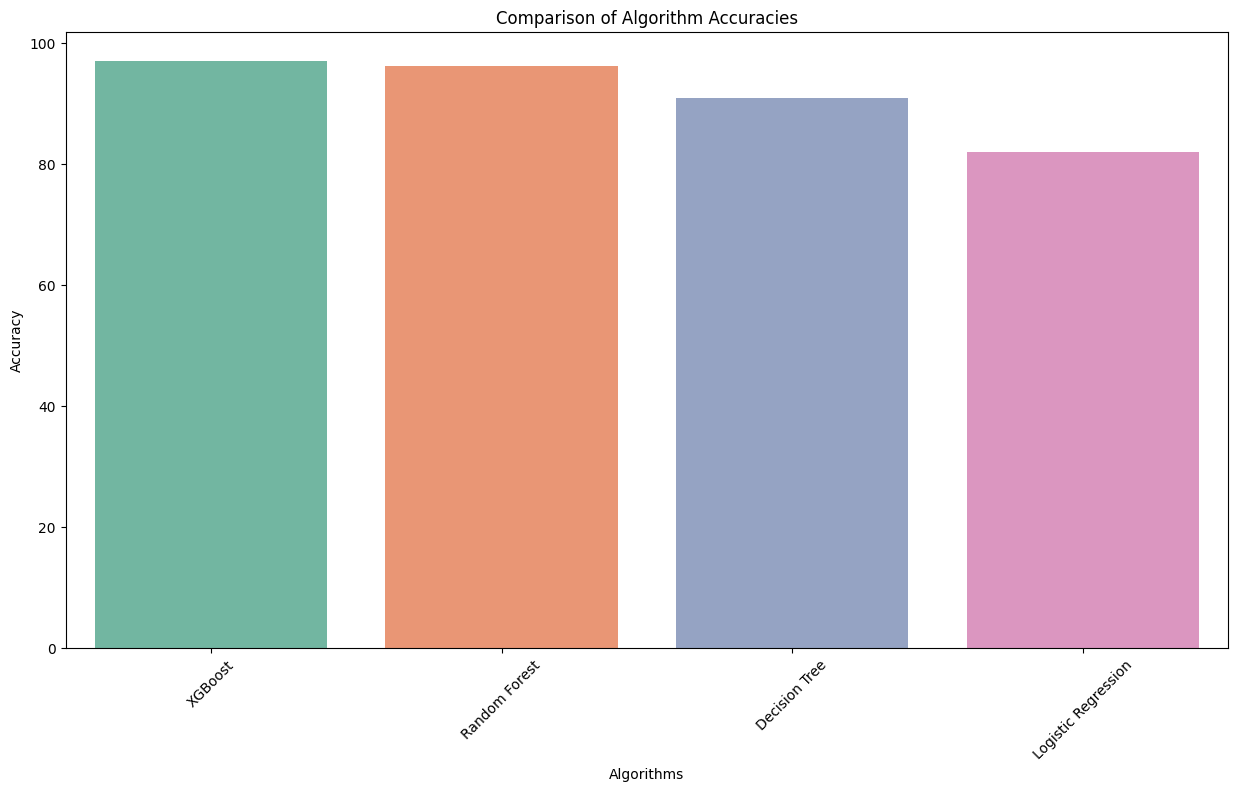

In [219]:
# Set figure size
plt.figure(figsize=(15,8))

# Plot bar chart with different colors
sns.barplot(x="Algorithm", y="Accuracy (%)", data=results_df, palette="Set2")  # palette adds different colors

# Labels and title
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparison of Algorithm Accuracies")
plt.xticks(rotation=45)

# Show plot
plt.savefig("performance.png")
plt.show()

Model Performance Summary:

Among the models tested, XGBoost achieved the highest accuracy at 97.07%, followed closely by Random Forest at 96.27%. Decision Tree performed reasonably well at 91.03%, while Logistic Regression, a linear model, achieved 81.97%. This indicates that tree-based ensemble methods are the most effective for predicting customer churn in this dataset.